### Goals / Value
- Find the optimal number of care coordinators in a given geographic area (Texas) to properly serve patients of Skilled Nursing Facilities (SNF’s).


In [23]:
import pandas as pd
import numpy as np
pd.set_option("max_rows", None)
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('../data/timeseries_base.csv')

In [4]:
df.head(20)

,week,pid,episodeid,contracttype,county,providerpracticezipcode,admit_week_start,discharge_week_start,first_week_regular,len_of_stay,admitdate,dischargedate,admit_week_days,discharge_week_days,discharge_plus_admit,admit,regular,discharge,week_admit,week_discharge
0,2018-12-31,6,17500,CT2,Brazos,77845,2018-12-31,2019-01-14,3,17,2019-01-01,2019-01-18,6,5,11,1.0,0.428571,0.0,1,0
1,2018-12-31,6,17793,CT2,Brazos,77845,2018-12-31,2019-01-14,3,16,2019-01-01,2019-01-17,6,4,10,1.0,0.428571,0.0,1,0
2,2018-12-31,6,18516,CT2,Brazos,77845,2018-12-31,2019-01-28,3,30,2019-01-01,2019-01-31,6,4,10,1.0,0.428571,0.0,1,0
3,2018-12-31,6,19016,CT2,Brazos,77845,2018-12-31,2019-01-14,3,15,2019-01-01,2019-01-16,6,3,9,1.0,0.428571,0.0,1,0
4,2018-12-31,6,19129,CT2,Brazos,77845,2018-12-31,2019-01-07,3,7,2019-01-01,2019-01-08,6,2,8,1.0,0.428571,0.0,1,0
5,2018-12-31,6,19387,CT2,Brazos,77845,2018-12-31,2019-01-07,3,10,2019-01-01,2019-01-11,6,5,11,1.0,0.428571,0.0,1,0
6,2018-12-31,6,48172,CT2,Brazos,77845,2018-12-31,2019-01-07,3,11,2019-01-01,2019-01-12,6,6,12,1.0,0.428571,0.0,1,0
7,2018-12-31,6,48173,CT2,Brazos,77845,2018-12-31,2018-12-31,3,5,2019-01-01,2019-01-06,6,7,13,1.0,1.000000,1.0,1,1
8,2018-12-31,6,48174,CT2,Brazos,77845,2018-12-31,2019-01-21,3,24,2019-01-01,2019-01-25,6,5,11,1.0,0.428571,0.0,1,0
9,2018-12-31,6,48175,CT2,Brazos,77845,2018-12-31,2019-01-14,3,17,2019-01-01,2019-01-18,6,5,11,1.0,0.428571,0.0,1,0


In [5]:
df.shape

(150089, 20)

In [6]:
df.describe()

,pid,episodeid,providerpracticezipcode,first_week_regular,len_of_stay,admit_week_days,discharge_week_days,discharge_plus_admit,admit,regular,discharge,week_admit,week_discharge
count,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000,150089.000000
mean,967.077507,25356.865400,76923.572767,1.355442,30.521571,3.933000,3.835284,7.768284,0.263390,0.689603,0.263390,0.263390,0.263390
std,539.170885,17488.478496,1347.932862,1.576256,25.677789,2.047609,2.010725,2.714245,0.408452,0.417019,0.440474,0.440474,0.440474
min,6.000000,1.000000,75002.000000,0.000000,-4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,506.000000,9242.000000,75707.000000,0.000000,15.000000,2.000000,2.000000,6.000000,0.000000,0.285714,0.000000,0.000000,0.000000
50%,1071.000000,18859.000000,77057.000000,0.000000,20.000000,3.000000,4.000000,8.000000,0.000000,0.857143,0.000000,0.000000,0.000000
75%,1463.000000,41110.000000,78028.000000,3.000000,35.000000,6.000000,6.000000,9.000000,0.666667,1.000000,1.000000,1.000000,1.000000
max,1813.000000,56817.000000,79936.000000,4.000000,100.000000,7.000000,7.000000,14.000000,1.000000,1.571429,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150089 entries, 0 to 150088
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   week                     150089 non-null  object 
 1   pid                      150089 non-null  int64  
 2   episodeid                150089 non-null  int64  
 3   contracttype             150089 non-null  object 
 4   county                   150089 non-null  object 
 5   providerpracticezipcode  150089 non-null  int64  
 6   admit_week_start         150089 non-null  object 
 7   discharge_week_start     150089 non-null  object 
 8   first_week_regular       150089 non-null  int64  
 9   len_of_stay              150089 non-null  int64  
 10  admitdate                150089 non-null  object 
 11  dischargedate            150089 non-null  object 
 12  admit_week_days          150089 non-null  int64  
 13  discharge_week_days      150089 non-null  int64  
 14  disc

In [8]:
numeric_df = df.select_dtypes(include=['int', 'float'])

# Print the column names contained in df
print(numeric_df.columns)

Index(['pid', 'episodeid', 'providerpracticezipcode', 'first_week_regular',
       'len_of_stay', 'admit_week_days', 'discharge_week_days',
       'discharge_plus_admit', 'admit', 'regular', 'discharge', 'week_admit',
       'week_discharge'],
      dtype='object')


In [9]:
object_df = df.select_dtypes(include=['object'])

# Print the column names contained in df
print(object_df.columns)

Index(['week', 'contracttype', 'county', 'admit_week_start',
       'discharge_week_start', 'admitdate', 'dischargedate'],
      dtype='object')


#### 'week', 'admit_week_start', 'discharge_week_start', 'admitdate', 'dischargedate' may have to be changed to date types for analysis. TBD

#### county, zip codes & more..

In [10]:
df['county'].nunique()

212

212 unique counties in total.

In [11]:
df['providerpracticezipcode'].nunique()

662

662 unique zip codes in total. 

In [12]:
df['pid'].nunique()

1244

There are 1,244 unique providers in our dataset.

#### Investigating providers at the county and zip code levels

In [13]:
df_unique=df.groupby('county')['pid','providerpracticezipcode'].nunique().add_prefix('num_').reset_index().sort_values('num_pid',ascending=False)
print(df_unique)

df_unique = pd.DataFrame(df_unique).reset_index()

            county  num_pid  num_providerpracticezipcode
85          Harris      114                           60
47          Dallas       79                           44
180        Tarrant       74                           40
13           Bexar       63                           27
185         Travis       29                           22
36          Collin       27                           14
90         Hidalgo       22                            9
57         El Paso       21                           11
65       Fort Bend       18                            7
12            Bell       17                            7
148         Nueces       17                            9
52          Denton       17                           10
133       McLennan       16                           10
173          Smith       15                            6
204     Williamson       15                            9
77           Gregg       14                            5
201        Wichita       14    

<ipython-input-13-9cad86426de2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_unique=df.groupby('county')['pid','providerpracticezipcode'].nunique().add_prefix('num_').reset_index().sort_values('num_pid',ascending=False)


In [59]:
total_pid = df_unique['num_pid'].sum()
assert total_pid == 1244

In [62]:
total_zipcode = df_unique['num_providerpracticezipcode'].sum()
assert total_zipcode == 662

##### Example of how to read the findings from the table above:
- Harris county has the most unique providers (114), spread across 60 different zip codes. 
- We can refer to the EDA that's been done on maps to determine if the sizes of the counties generally support the distribution of providers across the state. 

In [63]:
df_unique_providers = df_unique[['county','num_pid']]
df_unique_providers_10 = df_unique_providers.head(10)

df_unique_zipcodes = df_unique[['county','num_providerpracticezipcode']]
df_unique_zipcodes_10 = df_unique_zipcodes.head(10)

#### converting dates to date types

In [64]:
df['week'] = pd.to_datetime(df['week'])
df['admit_week_start'] = pd.to_datetime(df['admit_week_start'])
df['discharge_week_start'] = pd.to_datetime(df['discharge_week_start'])
df['admitdate'] = pd.to_datetime(df['admitdate'])
df['dischargedate'] = pd.to_datetime(df['dischargedate'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150089 entries, 0 to 150088
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   week                     150089 non-null  datetime64[ns]
 1   pid                      150089 non-null  int64         
 2   episodeid                150089 non-null  int64         
 3   contracttype             150089 non-null  object        
 4   county                   150089 non-null  object        
 5   providerpracticezipcode  150089 non-null  int64         
 6   admit_week_start         150089 non-null  datetime64[ns]
 7   discharge_week_start     150089 non-null  datetime64[ns]
 8   first_week_regular       150089 non-null  int64         
 9   len_of_stay              150089 non-null  int64         
 10  admitdate                150089 non-null  datetime64[ns]
 11  dischargedate            150089 non-null  datetime64[ns]
 12  admit_week_days 

In [66]:
df.to_csv('data_with_datetime_objects.csv', index=False)

In [67]:
timeseries1 = pd.read_csv('../notebooks/data_with_datetime_objects.csv', index_col='admitdate', parse_dates=True)
timeseries1 = timeseries1[['pid']]
timeseries1.head()

,pid
admitdate,
2019-01-01,6
2019-01-01,6
2019-01-01,6
2019-01-01,6
2019-01-01,6


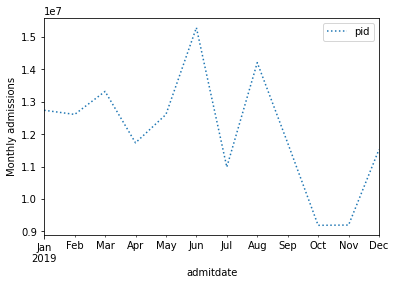

In [68]:
snf_traffic_per_month = timeseries1.resample('M').sum()
snf_traffic_per_month.plot(style=[':', '--', '-'])
plt.ylabel('Monthly admissions');